In [2]:
import os
os.environ['KAGGLE_USERNAME'] = "rajan" # username 
os.environ['KAGGLE_KEY'] = "bf4e2652a" # key 
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets # api copied from kaggle

 96% 81.0M/84.3M [00:02<00:00, 34.3MB/s]
100% 84.3M/84.3M [00:02<00:00, 41.7MB/s]


In [3]:
ls

covid19-xray-dataset-train-test-sets.zip  sample_data/


In [4]:
!unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0111-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0112-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0117-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0120

In [5]:
ls

covid19-xray-dataset-train-test-sets.zip  sample_data/  xray_dataset_covid19/


In [6]:
from keras.preprocessing.image import ImageDataGenerator
train=ImageDataGenerator(rescale=1/255.0,
                         rotation_range=20,
                         shear_range=0.4,
                         zoom_range=0.1,
                        horizontal_flip=True)
training=train.flow_from_directory(
    "xray_dataset_covid19/train",
    target_size=(150,150),
    class_mode="categorical"
)
testing=ImageDataGenerator(rescale=1/255.0)
testing=train.flow_from_directory(
    "xray_dataset_covid19/test",
    target_size=(150,150),
    class_mode="categorical"
)

Using TensorFlow backend.


Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


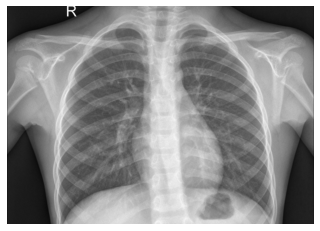

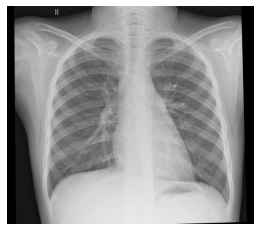

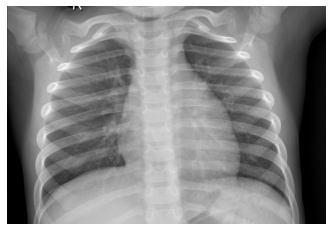

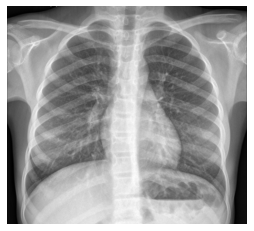

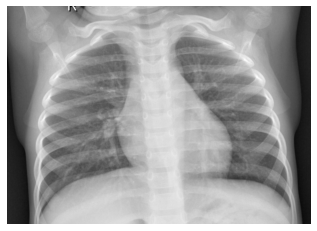

In [8]:
import matplotlib.pyplot as plt
imag=os.listdir("xray_dataset_covid19/train/NORMAL")
from keras.preprocessing import image
for i in imag[:5]:
  x=os.path.join("xray_dataset_covid19/train/NORMAL",i)
  img=image.load_img(x)
  img=image.img_to_array(img)/255.0
  plt.imshow(img)
  plt.axis("off")
  plt.show()
  

In [0]:
from keras.models import Model,Sequential
from keras.layers import *

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))

model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(2,activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 82946     
Total params: 93,090
Trainable params: 93,090
Non-trainable params: 0
__________________________________________________

In [0]:
from keras.optimizers import Adam
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [12]:
his=model.fit_generator(training,epochs=15)

Epoch 1/15
5/5 [==============================] - 9s 2s/step - loss: 0.6921 - accuracy: 0.6284
Epoch 2/15
5/5 [==============================] - 8s 2s/step - loss: 0.5085 - accuracy: 0.8311
Epoch 3/15
5/5 [==============================] - 8s 2s/step - loss: 0.3829 - accuracy: 0.8784
Epoch 4/15
5/5 [==============================] - 8s 2s/step - loss: 0.3050 - accuracy: 0.8851
Epoch 5/15
5/5 [==============================] - 8s 2s/step - loss: 0.2834 - accuracy: 0.8784
Epoch 6/15
5/5 [==============================] - 8s 2s/step - loss: 0.2267 - accuracy: 0.8986
Epoch 7/15
5/5 [==============================] - 8s 2s/step - loss: 0.2401 - accuracy: 0.8851
Epoch 8/15
5/5 [==============================] - 8s 2s/step - loss: 0.1965 - accuracy: 0.9257
Epoch 9/15
5/5 [==============================] - 8s 2s/step - loss: 0.1687 - accuracy: 0.9392
Epoch 10/15
5/5 [==============================] - 8s 2s/step - loss: 0.3254 - accuracy: 0.8784
Epoch 11/15
5/5 [==============================] 

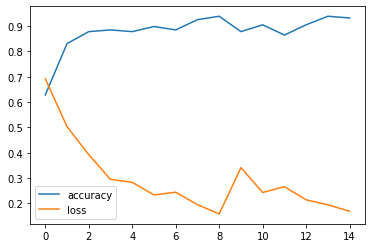

In [13]:
import matplotlib.pyplot as plt
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['loss'],label='loss')
plt.legend()
plt.show()

In [14]:
model.evaluate(testing)

2/2 [==============================] - 2s 813ms/step


[0.019918538630008698, 0.949999988079071]